## 第七章 迭代

本章介绍迭代，即重复运行某个代码块的能力。我们已经在 5.8 节接触了一种利用递归进行迭代的方式；在 4.2 节中，接触了另一种利用 `for` 循环进行迭代的方式。在本章中，我们将讨论另外一种利用 `while` 语句实现迭代的方式。不过，首先我想再多谈谈有关变量赋值的问题。

## 7.1 重新赋值

可能你已发现对同一变量进行多次赋值是合法的。新的赋值会使得已有的变量指向新的值（同时不再指向旧的值）。

In [10]:
x = 5
x

5

In [11]:
x = 7
x

7

第一次打印 `x` 时，它的值为 `5`；第二次打印时，它的值是 `7`。

图 7.1 展示了**重新赋值** 在状态图中看起来是什么样子。

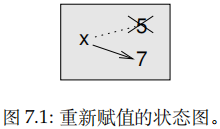

这里我想探讨一个常见的疑惑点。由于 Python 用等号 (=) 来赋值，所以很容易将 `a = b`这样的语句理解为数学上的相等命题；即 `a` 和 `b` 相等。但是这种理解是错误的。

首先，相等是一种对称关系，赋值不是。例如，在数学上，如果 $a = 7$，则 $7 = a$。但是在 Python 中，语句 `a = 7` 是合法的，`7 = a` 则不合法。

此外，数学中，相等命题不是对的就是错的。如果 $a = b$，那么 $a$ 则是永远与 $b$ 相等。Python 中，赋值语句可以使得两个变量相等，但是这两个变量不一定必须保持这个状态：

In [12]:
a = 5
b = a
a = 3
b

5

第三行改变了 `a` 的值，但是没有改变 `b` 的值，所以它们不再相等了。

给变量重新赋值非常有用，但是需要小心使用。对变量频繁重新赋值会使代码难于阅读，不易调试。

## 7.2 更新变量

重新赋值的一个常见方式是*更新* (update) ，更新操作中变量的新值会取决于旧值。

In [14]:
x = x + 1

这个语句的意思是，‘‘获得 `x` 的当前值并与 `1 `做加法求和，然后将 `x` 的值更新为所求的
和。”

如果试图去更新一个不存在的变量，则会返回一个错误。这是因为 Python 是先求式子
右边的值，然后再把所求的值赋给 `x`：

In [17]:
del x
x = x + 1

NameError: name 'x' is not defined

在更新变量之前，你得先初始化 (initialize) 它，通常是通过一个简单的赋值实现：

In [19]:
x = 0
x = x + 1

通过加 `1` 来更新变量叫做*递增* (increment)；减 `1` 叫做*递减* (decrement)。

## 7.3 while语句

计算机经常被用来自动处理重复性的任务。计算机很擅长无纰漏地重复相同或者相似的任务，而人类在这方面做的不好。在计算机程序中，重复也被称为*迭代* (iteration)。

我们已经见过两个利用递归来迭代的函数：`countdown` 和 `print_n` 。由于迭代的使用非常普遍，所以 Python 提供了使其更容易实现的语言特性。其中之一就是我们在 4.2 节看到的 `for` 语句。后面我们还会继续介绍。

另外一个用于迭代的语句是 `while` 。下面是使用 `while` 语句实现的 `countdown`：

In [21]:
def countdown(n):
    while n > 0:
        print(n)
        n = n - 1
    print('Blastoff!')

你可以像读英语句子一样来读 `while` 语句。它的意思是：‘‘只要 `n` 的值大于`0`，则打印出`n` 的值，然后让 `n` 减 `1`。当 `n` 递减至 `0 `时，打印单词 Blastoff！’’。

更正式地来说，`while` 语句的执行流程如下：

1. 首先判断条件为真 还是为假。

2. 如果为假，退出 `while` 语句，然后执行接下来的语句；

3. 如果条件为真，则运行 `while` 语句循环主体，运行完再返回第一步；

这种形式的流程叫做*循环* (loop)，因为第三步后又循环回到了第一步。循环主体应该改变一个或多个变量的值，这样的话才能让条件判断最终变为假，从而终止循环。否则，循环将会永远重复下去，这被称为*无限循环* (infinite loop)。在计算机科学家看来，洗发水的使用说明——‘‘抹洗发水，清洗掉，重复” 便是个无限循环，这总是会让他们觉得好笑。

对于 `countdown` 来说，我们可以证明循环是一定会终止的：当 `n` 是 `0` 或者负数，该循环就不会执行；不然 `n` 通过每次循环之后慢慢减小，最终也是会变成 `0 `的。有些其他循环，可能就没那么好理解了。例如：

In [24]:
def sequence(n):
    while n != 1:
        print(n)
        if n % 2 == 0:  # n is even
            n = n / 2
        else:           # n is odd
            n = n*3 + 1

循环的条件是 `n != 1`，所以循环会一直执行到 `n` 等于 `1`，条件判断为假时循环才终止。

每次循环，该程序打印出 `n` 的值，然后检查它是偶数还是奇数。如果它是偶数，那么` n`可以被 `2 `整除；如果是奇数，则它的值被替换为 `n*3 + 1`。

例如，如果传递给 `sequence` 的实参为 3，那么打印出的结果将会是：`3、10、5、16、8、4、2、1`。

由于 `n` 的值时增时减，所以不能轻易保证 `n `会最终变成 `1`，或者说这个程序能够终止。对于某些特殊的 `n` 的值，可以很好地证明它是可以终止的。例如，当 `n` 的初始值是 `2` 的倍数时，则每次循环后 `n` 一直为偶数，直到最终变为 `1`。上一个示例中，程序就打印了类似的序列，从 `16` 开始全部为偶数。

难点在于是否能证明程序对于**所有** 的正整数 n 都会终止。目前为止，还没有人证明**或者** 证伪该命题。

我们做个练习，利用迭代而非递归，重写之前 5.8 节中的 `print_n` 函数。

In [26]:
def print_n(s, n):
    while n > 0:
        print(s)
        n = n-1
    return

## 7.4 break

有些时候循环执行到一半你才知道循环该结束了。这种情况下，你可以使用 `break` 语来跳出循环。

例如，假设你想从用户那里获取输入，直到用户键入 `'done'`。你可以这么写：

In [31]:
while True:
    line = input('> ')
    if line == 'done':
        break
    print(line)
    
print('Done!')

> not done
not done
> done
Done!


循环条件是 `True`，其总是为真，所以该循环会一直执行直到碰到 `break`。

每次循环时，程序都会给出一个尖括号 (>) 提示。如果用户输入 `'done'`，执行 `break` 语句
跳出循环。否则，程序就会一直打印出用户所输入的内容并且跳到循环开始。

`while` 循环的这种写法很常见，因为你可以在循环的任何地方判断条件（而不只是在循环开始），而且你可以积极地表达终止条件（‘‘当出现这个情况是终止’’），而不是消极地表示（‘‘继续运行直到出现这个情况’’）。

## 7.5 平方根

循环常用于计算数值的程序中，这类程序一般从一个大概的值开始，然后迭代式地进行改进。

例如，牛顿法 (Newton’s method) 是计算平方根的一种方法。假设你想求 $a$ 的平方根如果你从任意一个估算值 $x$ 开始，则可以利用下面的公式计算出更为较为精确的估算值:

$$y=\frac{x=a/x}{2}$$

例如，假定 $a$ 是 4，$x$ 是 3：

In [34]:
a = 4
x = 3
y = (x + a/x) / 2
y

2.1666666666666665

可以看到，结果与真实值 ($\sqrt{4}=2$) 已经很接近了，如果我们用这个值再重新运算一遍，它将得到更为接近的值。

In [37]:
x = y
y = (x + a/x) / 2
y

2.0000102400262145

再通过多几次的运算，这个估算可以说已经是很精确了。

In [41]:
x = y
y = (x + a/x) / 2
y

2.0

一般来说，我们事先不知道要多少步才能得到正确答案，但是我们知道当估算值不再变动时，我们就获得了正确的答案。

In [44]:
x = y
y = (x + a/x) / 2
y

2.0

当 `y == x` 时，我们可以停止计算了。下面这个循环就是利用一个初始估值 `x`，循序渐进地计算，直到估值不再变化。

In [51]:
while True:
    print(x)
    y = (x + a/x) / 2
    if y == x:
        break;
    x = y,

2.0


对于大部分 `a` 的值，这个程序运行正常，不过一般来说，检查两个浮点数是否相等比较危险。浮点数只能大约表示：大多数有理数，如 $1/3$，以及无理数，如:$\sqrt{2}$，是不能用浮点数 ( `float` ) 来精确表示的

与其检查 `x` 和 `y` 的值是否完全相等，使用内置函数 `abs` 来计算二者之差的绝对值或数量级更为安全：

In [54]:
epsilon = 1e-3
while True:
    print(x)
    y = (x + a/x) / 2
    if abs(y-x) < epsilon:
        break
    x = y

2.0


这里，变量 `epsilon` 是一个决定其精确度的值，如 0.0000001。

## 7.6 算法

牛顿法就是一个算法 (Algorithm) 示例：它是解决一类问题的计算机制 (本例中是计算平方根)。

为了理解算法是什么，先了解什么不是算法或许有点帮助。你在学习一位数乘法时，可能背出了乘法表。实际上，你只是记住了 100 个确切的答案。这种知识并**不是**算法性的。

不过，如果你想找 ‘‘懒人方法’’，你可能就会找到一些诀窍。比如为了计算 n 和 9 的乘积，你可以把 $n − 1$ 作为乘积的第一位数，再把 $10 − n$ 作为第二位数，从而得到它们的乘积。这个诀窍是将任意个位数与 9 相乘的普遍解法。这就**是**一种算法。

类似地，你所学过的进位加法、借位减法、以及长除法都是算法。算法的特点之一就是不需要过多的脑力计算。算法是一个机械的过程，每一步都是依据一组简单的规则跟着上一步来执行的。

执行算法的过程是很乏味的，但是设计算法就比较有趣了，不但是智力上的挑战，更是计算机科学的核心。

一些人们自然而然无需下意识做到的事情，往往是难于用算法表达。理解自然语言就是这样的。我们每个人都听得懂自然语言，但是目前还没有人能够解释我们是怎么 做到的，至少无法以算法的形式解释。

## 7.7 调试 

当你开始写更为复杂的程序时，你会发现大部分时间都花费在调试上。更多的代码意味着更高的出错概率，并且会有更多隐藏 bug 的地方。

减少调试时间的一个方法就是“对分调试”。例如，如果程序有 100 行，你一次检查一行，就需要 100 步。

相反，试着将问题拆为两半。在代码中间部分或者附近的地方，寻找一个可以检查的中间值。加上一行 `print` 语句 (或是其他具有可验证效果的代码)，然后运行程序。

如果中间点检查出错了，那么就说明程序的前半部分存在问题。如果没问题，则说明是后半部分出错了。

每次你都这样检查，就可以将需要搜索的代码行数减少一半。经过 6 步之后 (这比 100小多了)，你将会找到那或者两行出错的代码，至少理论上是这样。

在实践中，可能并不能很好的确定程序的 ‘‘中间部分” 是什么，也有可能并不是那么好检查。计算行数并且取其中间行是没有意义的。相反，多考虑下程序中哪些地方比较容易出问题，或者哪些地方比较容易进行检查。然后选定一个检查点，在这个断点前后出现 bug 的概念差不多。

## 7.8 术语表

**重新赋值 (reassignment)：** 给已经存在的变量赋一个新的值。

**更新 (update)：** 变量的新值取决于旧值的一种赋值方法。

**初始化 (initialize)：** 给后面将要更新的变量一个初始值的一种赋值方法。

**递增 (increment)：** 通过增加变量的值的方式更新变量 (通常是加 1)。

**递减 (decrement)：** 通过减少变量的值的方式来更新变量。

**迭代 (iteration)：** 利用递归或者循环的方式来重复执行代一组语句的过程。

**无限循环 (infinite loop)：** 无法满足终止条件的循环。

**算法 (algorithm)：** 解决一类问题的通用过程。

## 7.9 练习

**Exercise 7.1.** 复制7.5 小节中的循环，将其封装进一个叫`mysqrt` 的函数中。这个函数接受`a` 作为形参，选择一个合适的`x` 值，并返回`a` 的平方根估算值。

为测试上面的函数，编写一个名为`test_squre_root` 的函数，打印出如下表格。

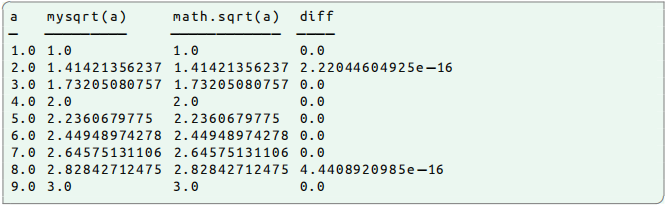

其中第一列是 $a$ 的值；第二列是通过`mysqrt` 计算得到的 $a$ 的平方根；第三列是用`math.sqrt`计算得到的平方根；第四列则是这两个平方根之差的绝对值。

In [159]:
import math

def mysqrt(a):
    x = 3
    epsilon = 1e-3
    while True:
        y = (x + a/x) / 2
        if abs(x-y) < epsilon:
            break
        x = y
    return x

def test_squre_root(n):
    print('a', end='\t\t')
    print('mysqrt(a)\t', end='\t')
    print('math.sqrt(a)\t', end='\t')
    print('diff')
    i = 1
    while(i <= n):
        print('%.1f'%i, end='\t\t')
        print('%.10f'%mysqrt(i), end='\t\t')
        print('%.10f'%math.sqrt(i), end='\t\t')
        print('%.10f'%abs(mysqrt(i) - math.sqrt(i)))
        i += 1

In [160]:
test_squre_root(9)

a		mysqrt(a)		math.sqrt(a)		diff
1.0		1.0000305180		1.0000000000		0.0000305180
2.0		1.4149984299		1.4142135624		0.0007848675
3.0		1.7321428571		1.7320508076		0.0000920496
4.0		2.0000102400		2.0000000000		0.0000102400
5.0		2.2360688956		2.2360679775		0.0000009181
6.0		2.4500000000		2.4494897428		0.0005102572
7.0		2.6458333333		2.6457513111		0.0000820223
8.0		2.8284313725		2.8284271247		0.0000042478
9.0		3.0000000000		3.0000000000		0.0000000000


**Exercise 7.2.** 内置函数`eval` 接受一个字符串，并使用 Python 解释器来计算该字符串。例如：

In [162]:
eval('1 + 2 * 3')

7

In [163]:
import math
eval('math.sqrt(5)')

2.23606797749979

In [164]:
eval('type(math.pi)')

float

编写一个名为`eval_loop` 的函数，迭代式地提示用户输入，获取输入的内容，并利用`eval`来计算其值，最后打印该值。

该程序应持续运行，直到用户输入`'done'`，然后返回它最后一次计算的表达式的值。

In [179]:
def eval_loop():
    while True:
        test = input('>')
        if test == 'done':
            print(flag)
            break
        print(eval(test))
        flag = eval(test)
    
eval_loop()

>2+2
4
>math.sqrt(5)
2.23606797749979
>pow(2,2)
4
>done
4


**Exercise 7.3.** 数学家斯里尼瓦瑟·拉马努金 (Srinivasa Ramanujan) 发现了一个可以用来生成 $1/pi$ 近似值的无穷级数 (infinite series)：
$$\frac{1}{\pi}=\frac{2\sqrt{2}}{9801}\sum^\inf_{k=0}\frac{(4k)!(1103+26390k)}{(k!)^4396^{4k}}$$

编写一个名为`estimate_pi` 的函数，利用上面公式来估算并返回$\pi$的值。这个函数应该使用`while` 循环来计算所有项的和，直到最后一项小于`1e−15` (Python 中用于表达 $10^{−15}$ 的写法) 时终止循环。你可以将该值与`math.pi` 进行比较，检测是否准确。

In [182]:
import math

def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        return result
    
def estimate_pi():
    total = 0
    k = 0
    factor = 2 * math.sqrt(2) / 9801
    while True:
        num = factorial(4*k) * (1103 + 26390*k)
        den = factorial(k)**4 * 396 **(4*k)
        term = factor * num / den
        total += term
        
        if abs(term) < 1e-15:
            break
        k += 1
    return 1 / total

print(estimate_pi())

3.141592653589793
